In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/listings_detailed.csv')

/Users/Marwin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24678 entries, 0 to 24677
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 20.0+ MB


In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [6]:
df.describe
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20200514190820,2020-05-15,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ion,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,100%,94%,f,https://a0.muscache.com/im/pictures/user/21428...,https://a0.muscache.com/im/pictures/user/21428...,Mitte,7.0,7.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.53454,13.40256,f,Guesthouse,Entire home/apt,3,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,""Free street p...",NaN,$60.00,NaN,NaN,$250.00,$30.00,1,$28.00,4,1125,4,59,1125,1125,33.5,1125.0,4 months ago,t,30,60,90,180,2020-05-15,132,7,2016-04-11,2020-04-03,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,7,7,0,0,2.65
1,3176,https://www.airbnb.com/rooms/3176,20200514190820,2020-05-15,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",NaN,NaN,https://a0.muscache.com/im/pictures/243355/84a...,NaN,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,NaN,NaN,67%,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users

In [7]:
df.country_code.unique()

array(['DE', 'US'], dtype=object)

In [8]:
df = df.assign(country_code='DE')
df.country_code.unique()

array(['DE'], dtype=object)

In [9]:
df.country.unique()

array(['Germany', 'United States'], dtype=object)

In [10]:
df = df.assign(country = 'Germany')
df.country.unique()

array(['Germany'], dtype=object)

In [11]:
df.state.unique()

array(['Berlin', nan, 'Germany', 'Brandenburg', 'Friedrichshain', 'Mitte',
       'Berlino', 'Pankow', 'berlin', 'Deutschland', 'Zehlendorf',
       'Berlín', 'DE', 'neukoelln', 'Neukölln', 'BB',
       'Schleswig-Holstein', 'Kreuzberg', 'Marzahn', 'MV', 'Wilmersdorf',
       'Weissensee', 'Charlottenburg', 'Köpenick', 'Wedding', 'SN', 'TH',
       'De', '.', 'Hellersdorf', 'Tempelhof', 'HB', '柏林', 'Берлин', 'NRW',
       'BY'], dtype=object)

In [12]:
df = df.assign(state='Berlin')
df.state.unique()

array(['Berlin'], dtype=object)

In [13]:
df.city.unique()

array(['Berlin', 'Berlin (Kreuzberg)', 'Friedrichshain', 'Berlin-Wedding',
       'Berlin-Mitte', 'Woltersdorf', 'Kleinmachnow',
       'Berlin-Friedrichshain', 'Baseler Straße 91 A, 12205 Berlin ',
       'Berlin-Neukölln', 'Berlin-Zehlendorf',
       'Baseler Straße 91 A,12205 Berlin', 'Berlin, Charlottenburg',
       'Βερολίνο', 'Kreuzberg, Berlin', 'Berlino', 'Berlin ', 'Berlín',
       'Berlin - Schöneberg', nan, 'Berlim', '柏林', 'Berlin Neukölln',
       'Berlin/Steglitz', 'Berlin, Mitte', 'Berlin - Mitte',
       'Prenzlauer Berg', 'Berlin, friedrichshain ',
       'Berlin- Charlottenburg', 'Berlin, Kreuzberg',
       'Berlin-Wilmersdorf', 'Berlin, Schöneberg', 'berlin',
       'Berlin (Wedding)', 'Mitte/Tiergarten', 'Berlin Friedrichshain',
       'Mitte', 'Wannsee', 'Weissenhoher Strasse 14',
       'Berlin Prenzlauer Berg ', 'Berlin-Köpenick', '10999 Berlin',
       'Panketal', 'Wilmersdorf', 'Erkner', 'Berlin, Berlin, DE',
       'Schöneberg', 'Hoppegarten', '.', '*', 'Potsda

In [14]:
df = df.assign(city='Berlin')
df.city.unique()

array(['Berlin'], dtype=object)

In [15]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20200514190820,2020-05-15,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ion,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,100%,94%,f,https://a0.muscache.com/im/pictures/user/21428...,https://a0.muscache.com/im/pictures/user/21428...,Mitte,7.0,7.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.53454,13.40256,f,Guesthouse,Entire home/apt,3,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,""Free street p...",NaN,$60.00,NaN,NaN,$250.00,$30.00,1,$28.00,4,1125,4,59,1125,1125,33.5,1125.0,4 months ago,t,30,60,90,180,2020-05-15,132,7,2016-04-11,2020-04-03,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,7,7,0,0,2.65
1,3176,https://www.airbnb.com/rooms/3176,20200514190820,2020-05-15,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",NaN,NaN,https://a0.muscache.com/im/pictures/243355/84a...,NaN,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,NaN,NaN,67%,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users

In [16]:
#host_id = df.groupby('host_id')
#host_id.describe()


In [17]:
df.price.describe

<bound method NDFrame.describe of 0         $60.00
1         $90.00
2         $28.00
3         $33.00
4        $180.00
          ...   
24673     $65.00
24674     $35.00
24675     $40.00
24676     $46.00
24677     $76.00
Name: price, Length: 24678, dtype: object>

In [18]:
df['price'] = df.price.str.replace('$', '')
df['price'] = df.price.str.replace(',', '')
df['price']= df.price.astype('float')
df.price.dtypes

dtype('float64')

In [19]:
df['host_since'].dtypes
df['host_since'].describe()

count          24657
unique          3410
top       2017-02-20
freq              66
Name: host_since, dtype: object

In [20]:
df['host_since'] = pd.to_datetime(df['host_since'])

In [21]:
#df['host_since'].unique()
df[df.host_since.isnull()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1023,1528556,https://www.airbnb.com/rooms/1528556,20200514190820,2020-05-15,Beautiful big room in Berlin Moabit,The room is quite big and perfect for two pers...,"The room is ideal for a couple or two friends,...",The room is quite big and perfect for two pers...,none,Moabit is very central and not that overloaded...,"If you have any further questions, let me know...","Nearst U-Bahn station is ""Birkenstraße"" with t...",You are welcome to use Kitchen + Bathroom. WLA...,"During your stay I will not be there, but I ha...","Non-smokers are very welcome, but you can smok...",NaN,NaN,https://a0.muscache.com/im/pictures/50417625/b...,NaN,8154292,https://www.airbnb.com/users/show/8154292,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Berlin, Berlin, Germany",Moabit,Moabit Ost,Mitte,Berlin,Berlin,10559,Berlin,"Berlin, Germany",DE,Germany,52.53066,13.34488,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,Elevator,""Buzzer/wirele...",NaN,45.0,$226.00,$700.00,NaN,NaN,2,$20.00,2,1125,2,2,1125,1125,2.0,1125.0,56 months ago,t,0,0,0,0,2020-05-15,3,0,2015-06-08,2015-08-17,100.0,10.0,9.0,10.0,10.0,9.0,9.0,t,NaN,NaN,f,f,flexible,f,f,1,0,1,0,0.05
1913,3662999,https://www.airbnb.com/rooms/3662999,20200514190820,2020-05-15,Schöne 2 Zi. Whg. in Kreuzberg,Wir vermieten unsere gemütliche 2 Zimmer-Wohnu...,Unsere Wohnung ist sehr liebevoll gestaltet. I...,Wir vermieten unsere gemütliche 2 Zimmer-Wohnu...,none,Ihr befindet euch bei uns im Szene-Gräfe-Kiez ...,-,Die Wohnung liegt sehr zentral. Die U7 und U8 ...,W-Lan und TV,-,Bitte geht respektvoll mit unserer Einrichtung...,NaN,NaN,https://a0.muscache.com/im/pictures/46266547/4...,NaN,17070776,https://www.airbnb.com/users/show/17070776,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Berlin, Berlin, Germany",Kreuzberg,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,Berlin,Berlin,10967,Berlin,"Berlin, Germany",DE,Germany,52.49302,13.41829,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,Kitchen,""Smoking allowed"",""P...",NaN,70.0,NaN,NaN,NaN,$30.00,1,$0.00,2,1125,2,2,1125,1125,2.0,1125.0,56 months ago,t,0,0,0,0,2020-05-15,2,0,2014-08-31,2015-08-26,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1,0,0,0.03
33

In [22]:
df.drop(index=[1023, 1913, 3345, 3469, 3479, 3525, 3606, 4054, 4124, 4128, 4147, 4259, 4665, 4743, 4867, 4927, 5390, 5890, 6509, 6868, 8315], inplace= True)

In [23]:
df[df.host_since.isnull()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [24]:
df['host_since']

0       2008-08-18
1       2008-10-19
2       2008-11-07
3       2009-05-16
4       2009-08-25
           ...    
24673   2015-04-21
24674   2020-05-13
24675   2011-07-23
24676   2018-11-21
24677   2015-10-12
Name: host_since, Length: 24657, dtype: datetime64[ns]

In [25]:
df['host_since_year'] = df['host_since'].dt.year.sort_index()
df['host_since_year']

0        2008
1        2008
2        2008
3        2009
4        2009
         ... 
24673    2015
24674    2020
24675    2011
24676    2018
24677    2015
Name: host_since_year, Length: 24657, dtype: int64

In [26]:
df.host_since_year.isnull().sum()

0

In [27]:
#df.host_since_year.value_counts().sort_index.plot(kind='bar')

In [28]:
df.host_since_year.value_counts()

2015    4445
2016    3761
2014    3694
2013    2893
2017    2467
2019    1975
2018    1935
2012    1803
2011    1041
2020     361
2010     224
2009      47
2008      11
Name: host_since_year, dtype: int64

In [29]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              50
                                                ... 
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4526
host_since_year                                    0
Length: 107, dtype: int64

In [30]:
hoods = df.groupby('neighbourhood_group_cleansed')
hood_mean = hoods['price'].mean().round(2)
hood_mean

neighbourhood_group_cleansed
Charlottenburg-Wilm.        119.35
Friedrichshain-Kreuzberg     66.03
Lichtenberg                  59.55
Marzahn - Hellersdorf        61.03
Mitte                        87.39
Neukölln                     52.08
Pankow                       71.58
Reinickendorf                48.68
Spandau                      64.39
Steglitz - Zehlendorf        62.70
Tempelhof - Schöneberg       99.92
Treptow - Köpenick           57.28
Name: price, dtype: float64

In [31]:
property_type = df.groupby('property_type')
property_type_count = df.property_type.value_counts()
df.property_type.value_counts()

Apartment                21790
Condominium                623
Loft                       495
House                      477
Serviced apartment         342
Hostel                     223
Hotel                      120
Townhouse                  110
Boutique hotel             108
Guest suite                 62
Guesthouse                  57
Bed and breakfast           44
Other                       34
Aparthotel                  30
Bungalow                    29
Houseboat                   19
Villa                       17
Tiny house                  14
Camper/RV                   13
Boat                        11
Cottage                      8
Pension (South Korea)        8
Cabin                        7
Barn                         4
Treehouse                    3
Vacation home                3
Castle                       2
Lighthouse                   1
Tipi                         1
Dome house                   1
Cave                         1
Name: property_type, dtype: int64

In [32]:
room_type = df.groupby('room_type')
room_type.count()
room_type_count = df.room_type.value_counts()
room_type_count

Entire home/apt    12746
Private room       11363
Shared room          305
Hotel room           243
Name: room_type, dtype: int64

In [51]:
hoods['id'].count()
hood_listings = hoods['id'].count()
hood_listings

neighbourhood_group_cleansed
Charlottenburg-Wilm.        1837
Friedrichshain-Kreuzberg    5712
Lichtenberg                  801
Marzahn - Hellersdorf        158
Mitte                       5239
Neukölln                    3698
Pankow                      3868
Reinickendorf                327
Spandau                      152
Steglitz - Zehlendorf        505
Tempelhof - Schöneberg      1641
Treptow - Köpenick           719
Name: id, dtype: int64

In [34]:
berlin = df[['id', 'host_id', 'host_is_superhost', 'neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude','property_type','room_type', 
            'bedrooms', 'beds', 'bed_type', 'accommodates', 'amenities','price','host_since', 'guests_included','minimum_nights','number_of_reviews',
            'reviews_per_month','review_scores_rating','instant_bookable','cancellation_policy','requires_license', 'license']]
berlin

,id,host_id,host_is_superhost,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bedrooms,beds,bed_type,accommodates,amenities,price,host_since,guests_included,minimum_nights,number_of_reviews,reviews_per_month,review_scores_rating,instant_bookable,cancellation_policy,requires_license,license
0,2015,2217,f,Mitte,Brunnenstr. Süd,Mitte,52.53454,13.40256,Guesthouse,Entire home/apt,1.0,0.0,Real Bed,3,"{TV,""Cable TV"",Wifi,Kitchen,Gym,""Free street p...",60.0,2008-08-18,1,4,132,2.65,93.0,f,strict_14_with_grace_period,t,NaN
1,3176,3718,f,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,52.53500,13.41758,Apartment,Entire home/apt,1.0,2.0,Real Bed,4,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,2008-10-19,2,62,145,1.09,93.0,f,strict_14_with_grace_period,t,NaN
2,3309,4108,f,Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,52.49885,13.34906,Apartment,Private room,1.0,1.0,Pull-out Sofa,1,"{Internet,Wifi,""Pets live on this property"",Ca...",28.0,2008-11-07,1,7,27,0.33,89.0,f,strict_14_with_grace_period,t,NaN
3,7071,17391,t,Prenzlauer Berg,Helmholtzplatz,Pankow,52.54316,13.41509,Apartment,Private room,1.0,2.0,Real Bed,2,"{Wifi,Heating,""Family/kid friendly"",Essentials...",33.0,2009-05-16,1,1,293,2.24,97.0,f,moderate,t,NaN
4,9991,33852,f,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,52.53303,13.41605,Apartment,Entire home/apt,4.0,7.0,Real Bed,7,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",180.0,2009-08-25,5,6,8,0.14,100.0,f,moderate,t,03/Z/RA/003410-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24673,43422635,31667990,f,Kreuzberg,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50169,13.43058,Apartment,Entire home/apt,2.0,3.0,Real Bed,4,"{Wifi,Kitchen,""Free street parking"",Heating,Wa...",65.0,2015-04-21,1,1,0,NaN,NaN,f,flexible,t,NaN
24674,43430815,346167573,f,Spandau,Spandau Mitte,Spandau,52.54527,13.20534,Apartment,Private room,1.0,4.0,Real Bed,4,"{Wifi,Kitchen,""Free parking on premises"",""Pets...",35.0,2020-05-13,1,1,0,NaN,NaN,t,flexible,t,NaN
24675,43432267,856367,f,Plänterwald,Plänterwald,Treptow - Köpenick,52.48207,13.46962,Apartment,Private room,1.0,1.0,Real Bed,2,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",40.0,2011-07-23,1,1,0,NaN,NaN,f,flexible,t,NaN
24676,43436282,226803356,f,Köpenick,Dammvorstadt,Treptow - Köpenick,52.45836,13.58493,Camper/RV,Private room,0.0,0.0,Real Bed,2,"{Wifi,Kitchen,""Pets allowed"",Heating,Essentials}",46.0,2018-11-21,1,1,0,NaN,NaN,t,flexible,t,NaN


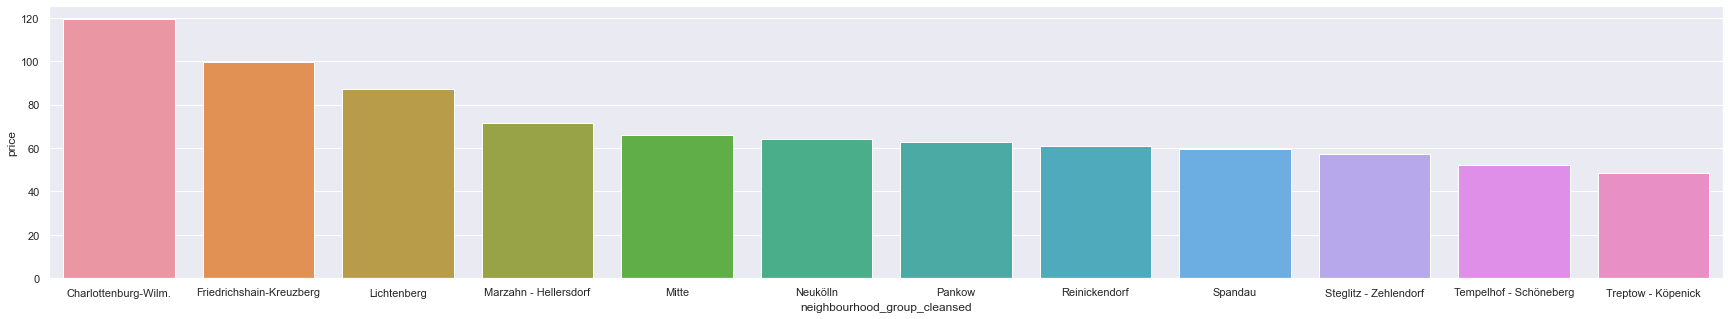

In [89]:
# Avg Price per Night by Neighborhood
sns.set(rc={'figure.figsize': (30,5)})
ax = sns.barplot(hood_mean.index, hood_mean.sort_values(ascending=False), data = berlin, ci = False)

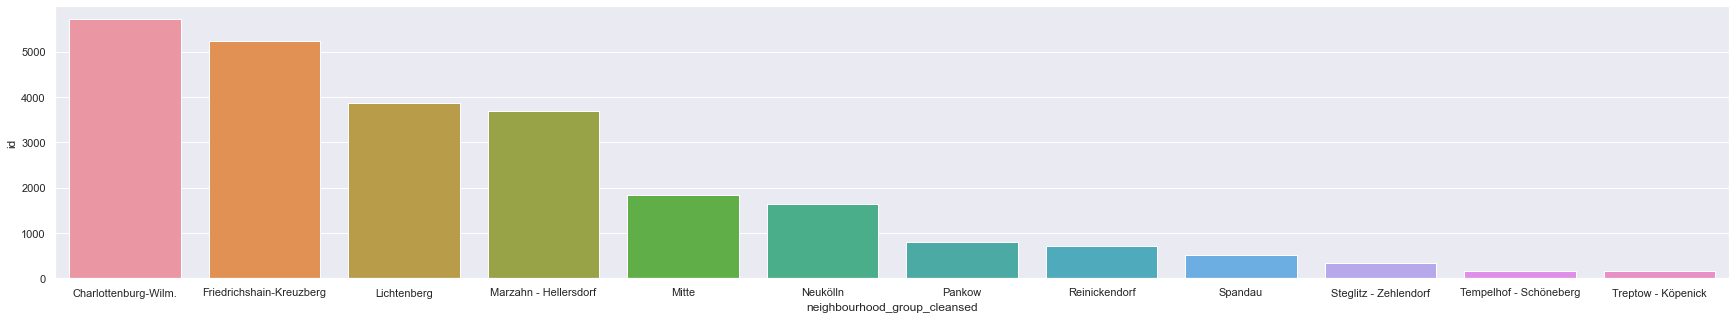

In [90]:
#Total Listings by Neighborhood
bx = sns.barplot(hood_listings.index, hood_listings.sort_values(ascending = False), data = berlin, ci = False)

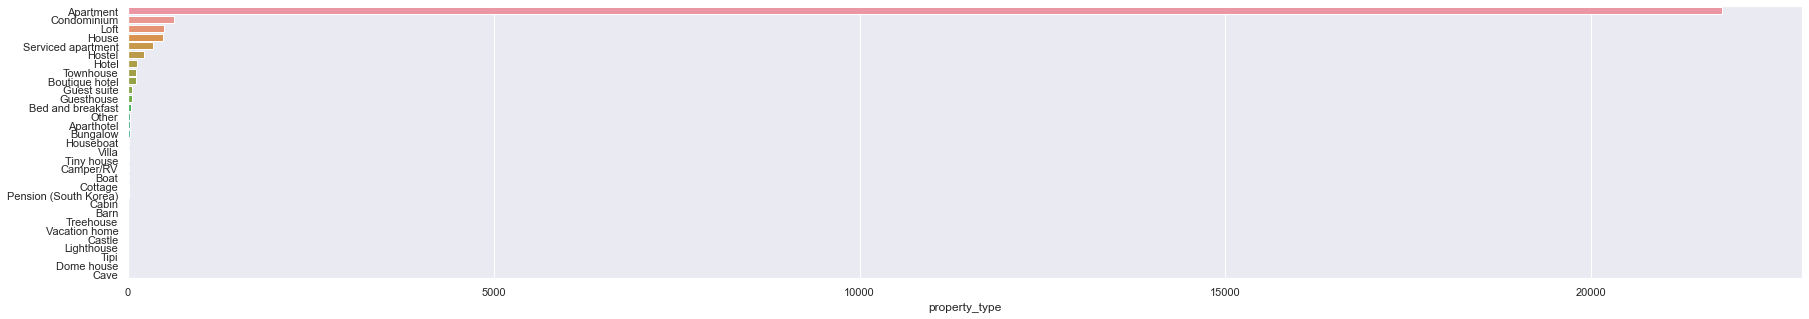

In [41]:
#Total Listings by Property
cx = sns.barplot(property_type_count, property_type_count.index data = berlin, orient= 'h', ci = False)

In [57]:
listing_hood_rooms = berlin[['neighbourhood_group_cleansed', 'room_type']]
hood_rooms = pd.crosstab(listing_hood_rooms.neighbourhood_group_cleansed, listing_hood_rooms.room_type)
hood_rooms

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group_cleansed,,,,
Charlottenburg-Wilm.,1026,49,741,21
Friedrichshain-Kreuzberg,2756,31,2868,57
Lichtenberg,353,14,413,21
Marzahn - Hellersdorf,93,1,62,2
Mitte,2811,71,2231,126
Neukölln,1602,0,2078,18
Pankow,2336,31,1477,24
Reinickendorf,157,0,166,4
Spandau,87,8,55,2


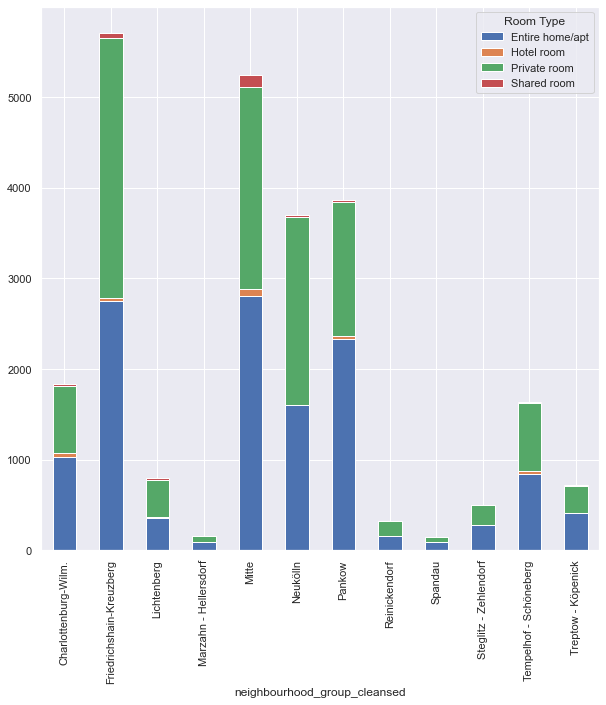

In [74]:
#Total Room-Types by Neighborhood
sns.set(rc={'figure.figsize': (10,10)})
hood_rooms.plot.bar(stacked=True)
plt.legend(title='Room Type')
plt.show()

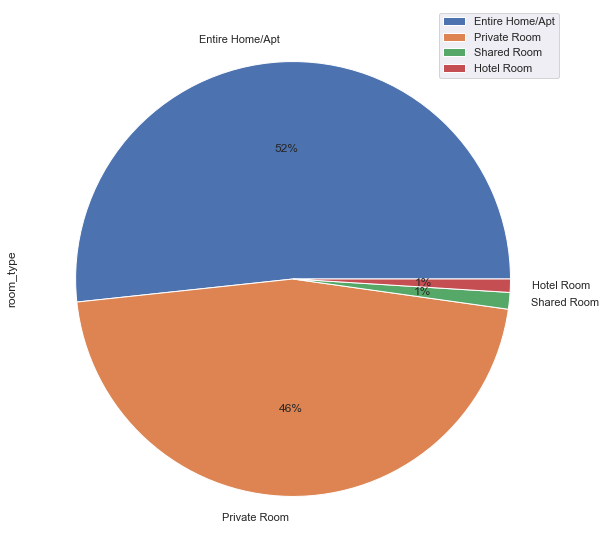

In [85]:
#Room-Type Composition
ngp = berlin['room_type'].value_counts().reset_index().plot( y= 'room_type', labels= ['Entire Home/Apt', 'Private Room', 'Shared Room','Hotel Room'], autopct='%1.0f%%',  kind = 'pie')

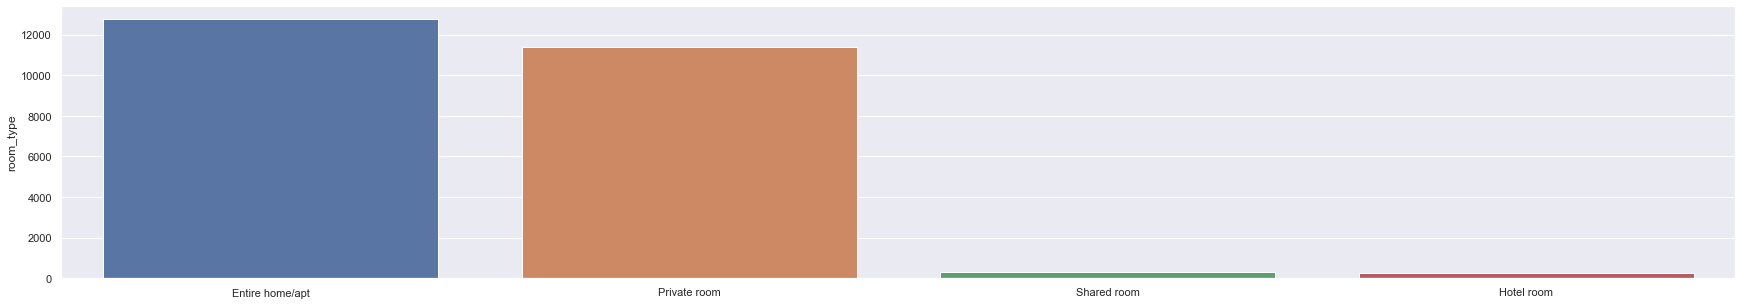

In [38]:
#Total Room-types
dx = sns.barplot(room_type_count.index, room_type_count, 
                 data = berlin, ci = False)